This is a Jupyter notebook to stack multiple rows of a detector (8K x 2K) after bias and dark corrections. It presents an enhancement of the dynamical range of a CMOS detector.

#  Background

CMOS detectors can be used to reach arbitrarily high signal-to-noise ratio as it is possible to read different parts (row-wise readout scheme) of the detector at different rates. An optical setup was made to form Newton's ring. Two transmitted Airy disk patterns were projected onto the CMOS detector. The centre of brightest pattern was located and the corresponding row was read out several times. Similarly, the centre of the faintest pattern was identified and the row was considered for one read out.

**Jupyter Notebook Author:** Supriyo Ghosh

## Objective
Process a raw image (object image), stack the brightest row and create a plot for bightest and faintest rows of the Airy  disks.

## Key steps
First step:

- Read the object image and plot it
- Separate out the bright chunk and faint row
- Based on the repetation number of the bright row, seperate out bright row from the bright chunk and stack the rows along an axis
- Add all bright rows
- Create a plot of bright row and the faint row

Second step:

- The object image is corrected for bias (For that, master bias is created by median combination).
- Repate the First step

Thrid step:

- The image is corrected for bias (created in the Second step) and dark (master dark is created by median combination).
- Repate the First step


### Python modules
* python 3
* numpy
* astropy
* matplotlib

In [1]:
import numpy as np
from astropy.io import fits
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from astropy.stats import sigma_clipped_stats

### First step


In [2]:
image_path = '/media/exohspec_supriyo/VERBATIM HD/CIS120/20250214/1row_strip/nd2_set10/obj/'
image_name = 'CIS120_DC_Vtra3.30V_Vref2.80V_ICf24.50_bias0b0_T-24_intT1ms.1.fits'
#image read
image_data = fits.getdata(image_path + image_name)

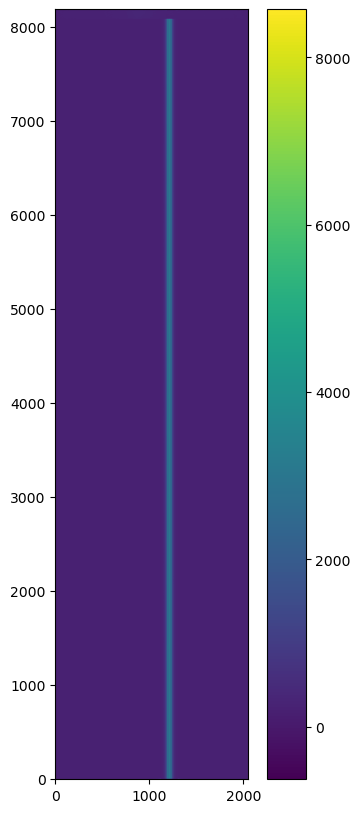

In [3]:
#plot the image
median, std = np.median(image_data), np.std(image_data)
plt.figure(figsize=(5,10))                     
plt.imshow(image_data, vmin = median - 2*std, vmax = median + 20*std, origin='lower')
plt.colorbar()
plt.show()

In [4]:
print(image_data.shape)

(8192, 2048)


In [5]:
#bright row repeated for 8082 times, array slicing, faint row once
image_data_bright = image_data[2:8084, :,] #1 rows strip, all cols
image_data_faint = image_data[8182:8183, :] #1 rows strip, all cols
print(image_data_bright.shape)
print(image_data_faint.shape)

(8082, 2048)
(1, 2048)


In [6]:
#seperate out bright row from the bright chunk and stack the rows along an axis
image_data_bright_row_stack = []
for i in range(image_data_bright.shape[0]):
    image_data_bright_row = image_data_bright[i:i+1,:] #one row, all cols
    image_data_bright_row_stack.append(image_data_bright_row)       

In [7]:
print(np.array(image_data_bright_row_stack).shape)

(8082, 1, 2048)


In [8]:
#Adding bright rows
image_data_bright_row_stack_sum = np.sum(image_data_bright_row_stack, axis=0)
print(image_data_bright_row_stack_sum.shape)

(1, 2048)


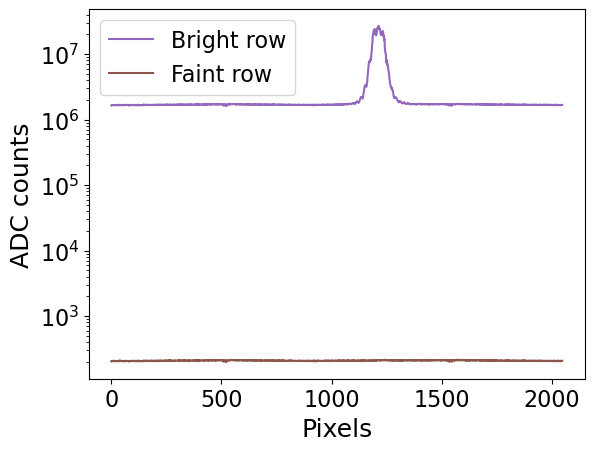

In [9]:
#plotting of bright and faint rows
plt.yscale("log") #y-axis in Logarithmic scale
plt.plot(image_data_bright_row_stack_sum.flatten(), c='tab:purple', label = 'Bright row')
plt.plot(image_data_faint.flatten(), c='tab:brown',label = 'Faint row')
plt.xlabel('Pixels',fontsize=18)
plt.ylabel('ADC counts',fontsize=18)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.legend(fontsize=16)
plt.show()

### Second step


#### Do the bias correction of the image and repeat the above process


In [10]:
#Read all bias frames
import glob
bias_path = '/media/exohspec_supriyo/VERBATIM HD/CIS120/20250214/1row_strip/nd2_set10/bias/'
imagelist_bias = glob.glob(bias_path + '*.fits')
print(imagelist_bias)

['/media/exohspec_supriyo/VERBATIM HD/CIS120/20250214/1row_strip/nd2_set10/bias/CIS120_DC_Vtra3.30V_Vref2.80V_ICf24.50_bias0b0_T-24_intT0ms.1.fits', '/media/exohspec_supriyo/VERBATIM HD/CIS120/20250214/1row_strip/nd2_set10/bias/CIS120_DC_Vtra3.30V_Vref2.80V_ICf24.50_bias0b0_T-24_intT0ms.2.fits', '/media/exohspec_supriyo/VERBATIM HD/CIS120/20250214/1row_strip/nd2_set10/bias/CIS120_DC_Vtra3.30V_Vref2.80V_ICf24.50_bias0b0_T-24_intT0ms.3.fits', '/media/exohspec_supriyo/VERBATIM HD/CIS120/20250214/1row_strip/nd2_set10/bias/CIS120_DC_Vtra3.30V_Vref2.80V_ICf24.50_bias0b0_T-24_intT0ms.4.fits', '/media/exohspec_supriyo/VERBATIM HD/CIS120/20250214/1row_strip/nd2_set10/bias/CIS120_DC_Vtra3.30V_Vref2.80V_ICf24.50_bias0b0_T-24_intT0ms.5.fits']


In [11]:
#Define a function to create master bias frame from all bias frames
def masterbias(imagelist):
    imageconcat = [fits.getdata(image) for image in imagelist]
    imageconcat = np.array(imageconcat)
    #print(imageconcat.shape)    
    imagemedian = np.median(imageconcat, axis=0)
    #plt.plot(imagemedian.flatten())
    #plt.show()
    return imagemedian

In [12]:
##call the masterbias function
master_bias = masterbias(imagelist_bias)

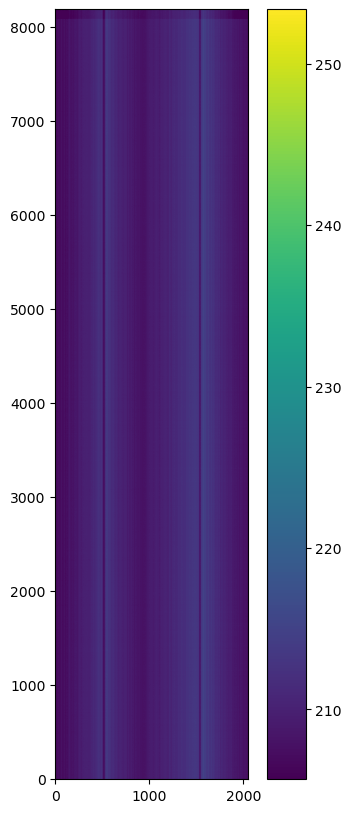

In [13]:
#plot the master bias
mean, median, std = sigma_clipped_stats(master_bias) 
plt.figure(figsize=(5,10))                     
plt.imshow(master_bias, vmin = median - 2*std, vmax = median + 20*std, origin='lower')
plt.colorbar()
plt.show()

In [14]:
#bias correction
image_data_biasC = image_data - master_bias

In [15]:
#bright row repeated for 8082 times, array slicing, faint row once
image_data_biasC_bright = image_data_biasC[2:8084, :,] #1 rows strip, all cols
image_data_biasC_faint = image_data_biasC[8182:8183, :] #1 rows strip, all cols

In [16]:
#seperate out bright row from the bright chunk and stack the rows along an axis
image_data_biasC_bright_row_stack = []
for i in range(image_data_biasC_bright.shape[0]):
    image_data_biasC_bright_row = image_data_biasC_bright[i:i+1,:] #one row, all cols
    image_data_biasC_bright_row_stack.append(image_data_biasC_bright_row)

In [17]:
#sum of stacked single rows
image_data_biasC_bright_row_stack_sum = np.sum(image_data_biasC_bright_row_stack, axis=0)


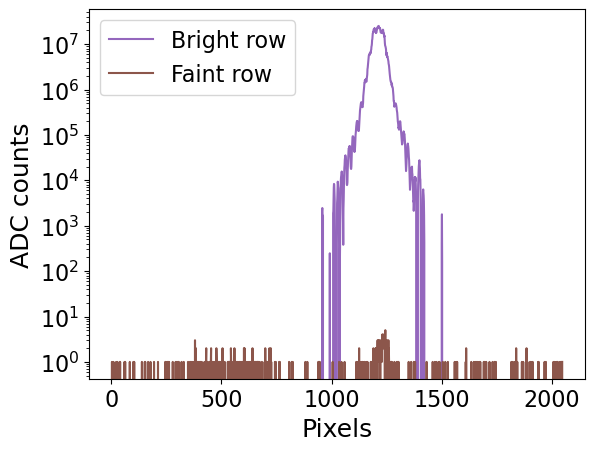

In [18]:
#plotting after correcting bias and stacking the bright row
plt.yscale("log") #y-axis in Logarithmic scale
plt.plot(image_data_biasC_bright_row_stack_sum.flatten(), c='tab:purple', label = 'Bright row')
plt.plot(image_data_biasC_faint.flatten(), c='tab:brown',label = 'Faint row')
plt.xlabel('Pixels',fontsize=18)
plt.ylabel('ADC counts',fontsize=18)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.legend(fontsize=16)
plt.show()

In [19]:
#To make the plot look better
#if count of any pixels is less than 1, count will be 1.
image_data_biasC_bright_row_stack_sum[image_data_biasC_bright_row_stack_sum < 1] = 1.
image_data_biasC_faint[image_data_biasC_faint < 1]  = 1.

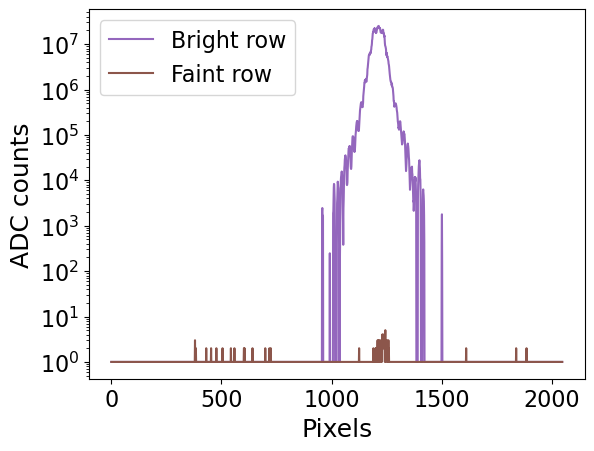

In [20]:
#plot again
plt.yscale("log") #y-axis in Logarithmic scale
plt.plot(image_data_biasC_bright_row_stack_sum.flatten(), c='tab:purple', label = 'Bright row')
plt.plot(image_data_biasC_faint.flatten(), c='tab:brown',label = 'Faint row')
plt.xlabel('Pixels',fontsize=18)
plt.ylabel('ADC counts',fontsize=18)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.legend(fontsize=16)
plt.show()

### Third step

#### Both bias and dark correction of the image and repeat the process of the first step


In [21]:
#dark correction
#Read dark frames
dark_path = '/media/exohspec_supriyo/VERBATIM HD/CIS120/20250214/1row_strip/nd2_set10/dark/'
imagelist_dark = glob.glob(dark_path + '*intT1ms*.fits') #dark of 1ms
print(imagelist_dark)

['/media/exohspec_supriyo/VERBATIM HD/CIS120/20250214/1row_strip/nd2_set10/dark/CIS120_DC_Vtra3.30V_Vref2.80V_ICf24.50_bias0b0_T-24_intT1ms.1.fits', '/media/exohspec_supriyo/VERBATIM HD/CIS120/20250214/1row_strip/nd2_set10/dark/CIS120_DC_Vtra3.30V_Vref2.80V_ICf24.50_bias0b0_T-24_intT1ms.2.fits', '/media/exohspec_supriyo/VERBATIM HD/CIS120/20250214/1row_strip/nd2_set10/dark/CIS120_DC_Vtra3.30V_Vref2.80V_ICf24.50_bias0b0_T-24_intT1ms.3.fits', '/media/exohspec_supriyo/VERBATIM HD/CIS120/20250214/1row_strip/nd2_set10/dark/CIS120_DC_Vtra3.30V_Vref2.80V_ICf24.50_bias0b0_T-24_intT1ms.4.fits', '/media/exohspec_supriyo/VERBATIM HD/CIS120/20250214/1row_strip/nd2_set10/dark/CIS120_DC_Vtra3.30V_Vref2.80V_ICf24.50_bias0b0_T-24_intT1ms.5.fits']


In [22]:
#define a function to median combine dark frames after bias correction and return master dark data
#master bias is created in the Second step
def masterdark(imagelist, biasdata=masterbias):
    imageconcat = [fits.getdata(image) for image in imagelist]
    imageconcat = np.array(imageconcat)
    #print(imageconcat.shape)
    
    newimageconcat = np.subtract(imageconcat, biasdata) #bias subtraction
    #print(newimageconcat.shape)
    imagemedian = np.median(newimageconcat, axis=0)
    #print(imagemedian.shape)
    #plt.plot(imagemedian.flatten())
    #plt.show()
    return imagemedian

In [23]:
#call masterdark to create master dark data
master_dark = masterdark(imagelist_dark, master_bias)

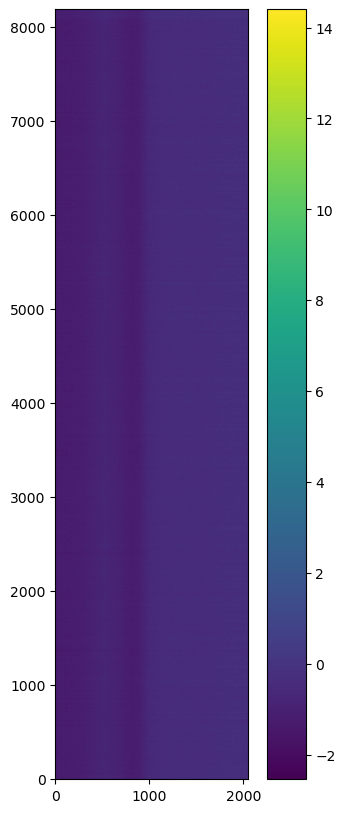

In [24]:
#plot the master dark
mean, median, std = sigma_clipped_stats(master_dark) 
plt.figure(figsize=(5,10))                     
plt.imshow(master_dark, vmin = median - 2*std, vmax = median + 20*std, origin='lower')
plt.colorbar()
plt.show()

In [25]:
#plt.plot(master_dark[:,:].flatten())
#plt.show()

In [26]:
#both bias and dark corrections
image_data_clean = image_data - master_bias - master_dark

In [27]:
#bright row repeated for 8082 times, array slicing, faint row once
image_data_clean_bright = image_data_clean[2:8084, :,] #1 rows strip, all cols
image_data_clean_faint = image_data_clean[8182:8183, :] #1 rows strip, all cols

In [28]:
image_data_clean_bright_row_stack = []
for i in range(image_data_clean_bright.shape[0]):
    image_data_clean_bright_row = image_data_clean_bright[i:i+1,:] #one row, all cols
    image_data_clean_bright_row_stack.append(image_data_clean_bright_row)

In [29]:
#sum of stacked single rows
image_data_clean_bright_row_stack_sum = np.sum(image_data_clean_bright_row_stack, axis=0)

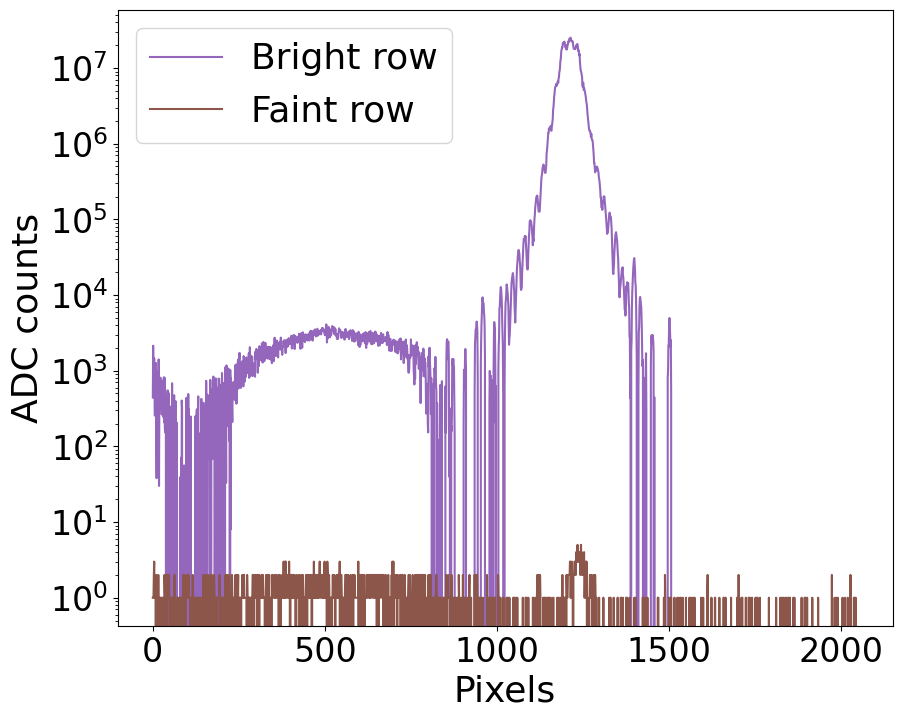

In [30]:
#plotting after correcting bias and stacking the bright row
plt.figure(figsize=(10,8))                     
plt.yscale("log") #y-axis in Logarithmic scale
plt.plot(image_data_clean_bright_row_stack_sum.flatten(), c='tab:purple', label = 'Bright row')
plt.plot(image_data_clean_faint.flatten(), c='tab:brown',label = 'Faint row')
plt.xlabel('Pixels',fontsize=26)
plt.ylabel('ADC counts',fontsize=26)
plt.xticks(fontsize= 24)
plt.yticks(fontsize= 24)
plt.legend(fontsize=26)
plt.savefig("cis120_stacked.pdf", format="pdf", bbox_inches="tight")
plt.show()

In [31]:
#To make the plot look better
#if count of any pixels is less than 1, count will be 1.
image_data_clean_bright_row_stack_sum[image_data_clean_bright_row_stack_sum < 1] = 1.
image_data_clean_faint[image_data_clean_faint < 1]  = 1.

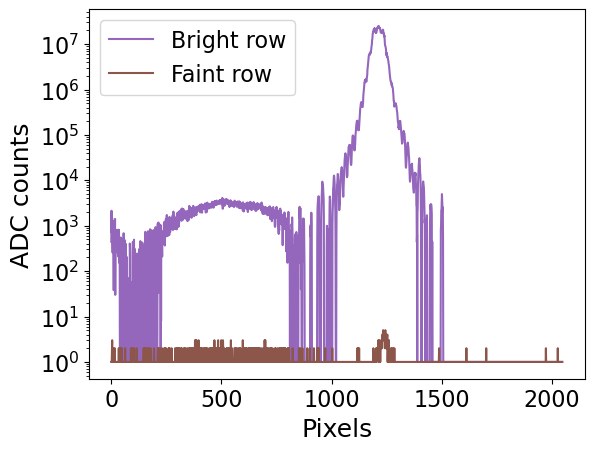

In [32]:
#plot again
plt.yscale("log") #y-axis in Logarithmic scale
plt.plot(image_data_clean_bright_row_stack_sum.flatten(), c='tab:purple', label = 'Bright row')
plt.plot(image_data_clean_faint.flatten(), c='tab:brown',label = 'Faint row')
plt.xlabel('Pixels',fontsize=18)
plt.ylabel('ADC counts',fontsize=18)
plt.xticks(fontsize= 16)
plt.yticks(fontsize= 16)
plt.legend(fontsize=16)
plt.show()